<a href="https://colab.research.google.com/github/pbcquoc/vietocr/blob/master/vietocr_gettingstart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Introduction
<p align="center">
<img src="https://raw.githubusercontent.com/pbcquoc/vietocr/master/image/vietocr.jpg" width="512" height="512">
</p>
This notebook describe how you can use VietOcr to train OCR model




In [1]:
! pip install --quiet vietocr


[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: pip install --upgrade pip


# Inference

In [3]:
# bổ sung thêm các thư viện cần thiết
! pip install --quiet --upgrade pip
! pip install --quiet torch torchvision torchaudio

In [4]:
import matplotlib.pyplot as plt
from PIL import Image

from vietocr.tool.predictor import Predictor
from vietocr.tool.config import Cfg

/Users/mr.jack/Downloads/vietocr/.venv/lib/python3.12/site-packages/gdown/__init__.py:3: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  import pkg_resources


In [5]:
config = Cfg.load_config_from_name('vgg_transformer')

Change weights to your weights or using default weights from our pretrained model. Path can be url or local file

In [ ]:
# tải trọng số đã huấn luyện sẵn
! mkdir weights
! wget -P weights https://vocr.vn/data/vietocr/vgg_transformer.pth

--2025-09-20 14:38:28--  https://vocr.vn/data/vietocr/vgg_transformer.pth
Resolving vocr.vn (vocr.vn)... 128.199.222.116
Connecting to vocr.vn (vocr.vn)|128.199.222.116|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 151815373 (145M) [application/octet-stream]
Saving to: ‘weights/vgg_transformer.pth’

vgg_transformer.pth 100%[===================>] 144.78M  18.2MB/s    in 11s     

2025-09-20 14:38:39 (13.5 MB/s) - ‘weights/vgg_transformer.pth’ saved [151815373/151815373]



In [ ]:
# Update đường dẫn đến file trọng số
config['weights'] = './weights/vgg_transformer.pth'
config['cnn']['pretrained']=False
# Sử dụng CPU hoặc GPU
config['device'] = 'cpu'  # 'cuda:0'

In [10]:
detector = Predictor(config)

/Users/mr.jack/Downloads/vietocr/.venv/lib/python3.12/site-packages/torch/nn/modules/transformer.py:392: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(


In [11]:
! wget https://vocr.vn/data/vietocr/sample.zip
! unzip  -qq -o sample.zip

--2025-09-20 14:40:11--  https://vocr.vn/data/vietocr/sample.zip
Resolving vocr.vn (vocr.vn)... 128.199.222.116
Connecting to vocr.vn (vocr.vn)|128.199.222.116|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 305969 (299K) [application/zip]
Saving to: ‘sample.zip’

sample.zip          100%[===================>] 298.80K  1.90MB/s    in 0.2s    

2025-09-20 14:40:11 (1.90 MB/s) - ‘sample.zip’ saved [305969/305969]



In [13]:
! ls sample | head -n 5

00019816.jpg
001063014772.jpeg
001085019081.jpeg
001195005971.jpeg
026087002892.jpeg


'VŨ THUỲ NINH'

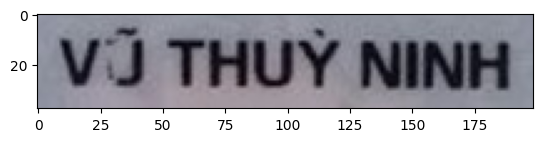

In [14]:
img = './sample/031189003299.jpeg'
img = Image.open(img)
plt.imshow(img)
s = detector.predict(img)
s

# Download sample dataset

In [15]:
! wget https://vocr.vn/data/vietocr/data_line.zip

--2025-09-20 14:40:26--  https://vocr.vn/data/vietocr/data_line.zip
Resolving vocr.vn (vocr.vn)... 128.199.222.116
Connecting to vocr.vn (vocr.vn)|128.199.222.116|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 61212284 (58M) [application/zip]
Saving to: ‘data_line.zip’

data_line.zip       100%[===================>]  58.38M  17.8MB/s    in 3.3s    

2025-09-20 14:40:29 (17.8 MB/s) - ‘data_line.zip’ saved [61212284/61212284]



In [16]:
! unzip -qq -o ./data_line.zip

# Train model



1.   Load your config
2.   Train model using your dataset above



Load the default config, we adopt VGG for image feature extraction

In [17]:
from vietocr.tool.config import Cfg
from vietocr.model.trainer import Trainer

# Change the config 

* *data_root*: the folder save your all images
* *train_annotation*: path to train annotation
* *valid_annotation*: path to valid annotation
* *print_every*: show train loss at every n steps
* *valid_every*: show validation loss at every n steps
* *iters*: number of iteration to train your model
* *export*: export weights to folder that you can use for inference
* *metrics*: number of sample in validation annotation you use for computing full_sequence_accuracy, for large dataset it will take too long, then you can reuduce this number


In [18]:
config = Cfg.load_config_from_name('vgg_transformer')

In [29]:

dataset_params = {
    'name':'hw',
    'data_root':'./data_line/',
    'train_annotation':'train_line_annotation.txt',
    'valid_annotation':'test_line_annotation.txt'
}

params = {
         'print_every':1,
         'valid_every':1*100,
          'iters':100,
          'checkpoint':'./checkpoint/transformerocr_checkpoint.pth',    
          'export':'./weights/transformerocr.pth',
          'metrics': 1000
         }

config['trainer'].update(params)
config['dataset'].update(dataset_params)
config['device'] = 'cpu'  # 'cuda:0'

config['trainer']['batch_size'] = 4 # use small batch size for low resource devices like colab
config['dataloader']['num_workers'] = 0 # use 0 for low resource devices like colab

you can change any of these params in this full list below

In [30]:
config

{'vocab': 'aAàÀảẢãÃáÁạẠăĂằẰẳẲẵẴắẮặẶâÂầẦẩẨẫẪấẤậẬbBcCdDđĐeEèÈẻẺẽẼéÉẹẸêÊềỀểỂễỄếẾệỆfFgGhHiIìÌỉỈĩĨíÍịỊjJkKlLmMnNoOòÒỏỎõÕóÓọỌôÔồỒổỔỗỖốỐộỘơƠờỜởỞỡỠớỚợỢpPqQrRsStTuUùÙủỦũŨúÚụỤưƯừỪửỬữỮứỨựỰvVwWxXyYỳỲỷỶỹỸýÝỵỴzZ0123456789!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~ ',
 'device': 'cpu',
 'seq_modeling': 'transformer',
 'transformer': {'d_model': 256,
  'nhead': 8,
  'num_encoder_layers': 6,
  'num_decoder_layers': 6,
  'dim_feedforward': 2048,
  'max_seq_length': 1024,
  'pos_dropout': 0.1,
  'trans_dropout': 0.1},
 'optimizer': {'max_lr': 0.0003, 'pct_start': 0.1},
 'trainer': {'batch_size': 4,
  'print_every': 1,
  'valid_every': 100,
  'iters': 100,
  'export': './weights/transformerocr.pth',
  'checkpoint': './checkpoint/transformerocr_checkpoint.pth',
  'log': './train.log',
  'metrics': 1000},
 'dataset': {'name': 'hw',
  'data_root': './data_line/',
  'train_annotation': 'train_line_annotation.txt',
  'valid_annotation': 'test_line_annotation.txt',
  'image_height': 32,
  'image_min_width': 32,
  'image

You should train model from our pretrained 

In [31]:
trainer = Trainer(config, pretrained=True)

Model weight /var/folders/4w/l86mc_ds1w18wndml7dsghz00000gn/T/vgg_transformer.pth exsits. Ignore download!
train_hw exists. Remove folder if you want to create new dataset


train_hw build cluster: 100%|███████████████████████████████| 5482/5482 [00:00<00:00, 505255.66it/s]

valid_hw exists. Remove folder if you want to create new dataset



valid_hw build cluster: 100%|███████████████████████████████| 1812/1812 [00:00<00:00, 363327.22it/s]


Save model configuration for inference, load_config_from_file

In [32]:
trainer.config.save('config.yml')

Visualize your dataset to check data augmentation is appropriate

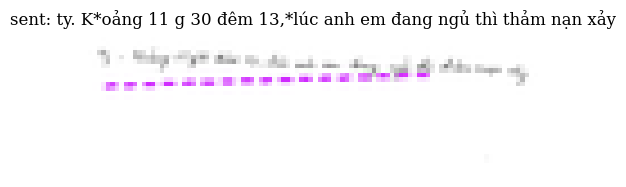

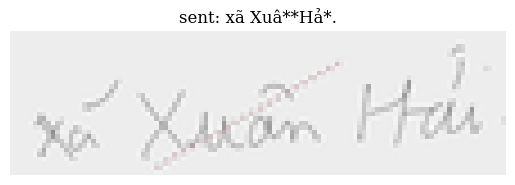

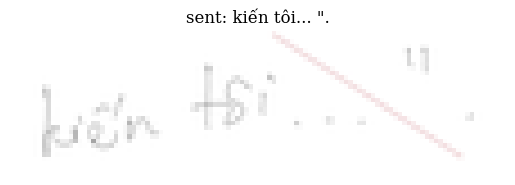

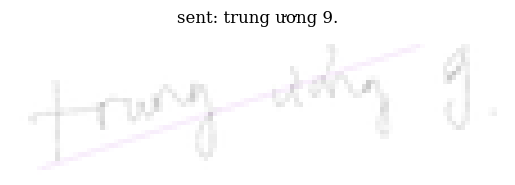

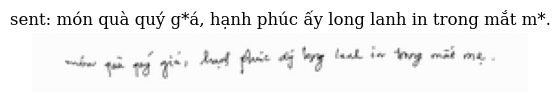

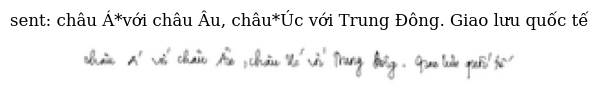

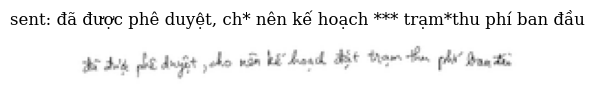

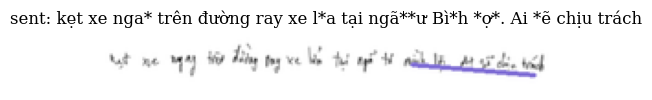

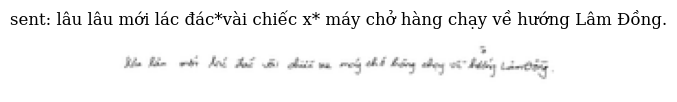

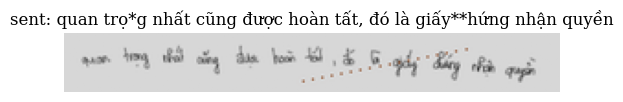

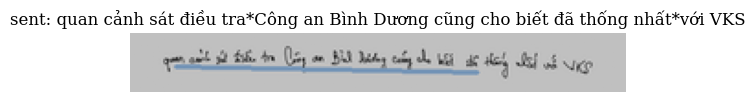

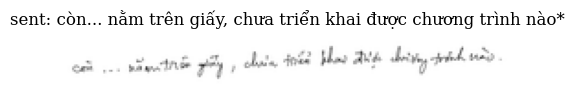

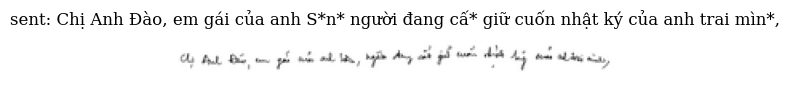

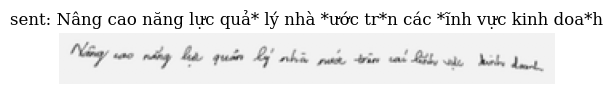

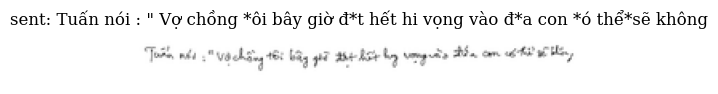

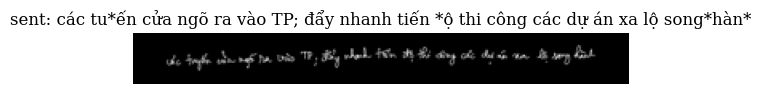

In [33]:
trainer.visualize_dataset()

Train now

In [34]:
trainer.train()

iter: 000001 - train loss: 2.483 - lr: 2.07e-05 - load time: 0.02 - gpu time: 0.63
iter: 000002 - train loss: 2.579 - lr: 4.57e-05 - load time: 0.00 - gpu time: 0.57
iter: 000003 - train loss: 2.552 - lr: 8.40e-05 - load time: 0.00 - gpu time: 0.58
iter: 000004 - train loss: 2.227 - lr: 1.31e-04 - load time: 0.00 - gpu time: 0.58
iter: 000005 - train loss: 2.180 - lr: 1.81e-04 - load time: 0.00 - gpu time: 0.58
iter: 000006 - train loss: 2.672 - lr: 2.28e-04 - load time: 0.00 - gpu time: 0.54
iter: 000007 - train loss: 2.442 - lr: 2.66e-04 - load time: 0.00 - gpu time: 0.67
iter: 000008 - train loss: 2.311 - lr: 2.91e-04 - load time: 0.00 - gpu time: 0.61
iter: 000009 - train loss: 2.337 - lr: 3.00e-04 - load time: 0.00 - gpu time: 0.57
iter: 000010 - train loss: 2.210 - lr: 3.00e-04 - load time: 0.00 - gpu time: 0.60
iter: 000011 - train loss: 2.253 - lr: 3.00e-04 - load time: 0.00 - gpu time: 0.58
iter: 000012 - train loss: 2.190 - lr: 2.99e-04 - load time: 0.00 - gpu time: 0.61
iter

Visualize prediction from our trained model


In [ ]:
trainer.visualize_prediction()

Compute full seq accuracy for full valid dataset

In [ ]:
trainer.precision()